<a href="https://colab.research.google.com/github/Sandermi99/MEDT4165/blob/main/Exercise1_SPUltrasound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal



500


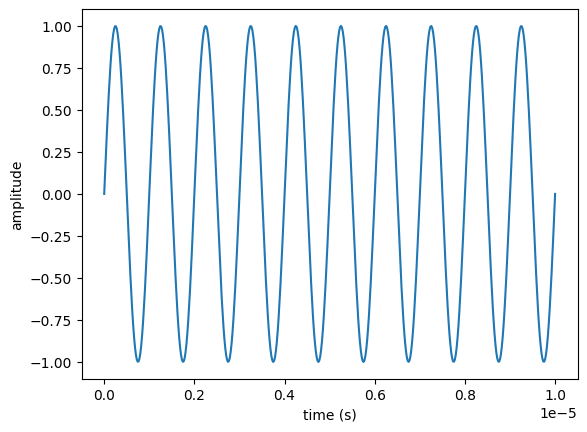

In [3]:
#Signal generation and plotting

f0 = 1e6
fc = 50e6
tstart = 0
tstop = 10e-6
N = int(fc*tstop)
t = np.linspace(tstart, tstop, N)
y = np.sin(2*np.pi*f0*t)
print(N)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.plot(t, y)
plt.show()

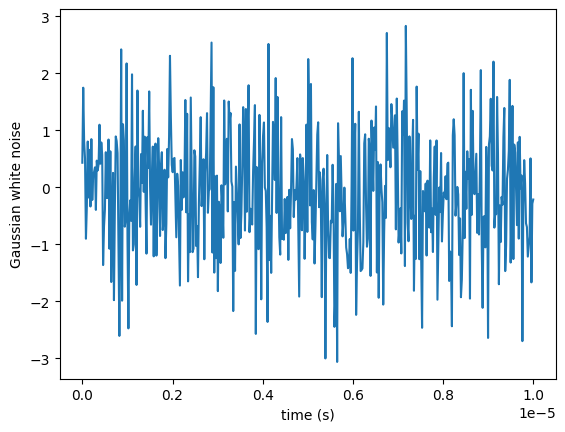

In [4]:
#generating noise

n = np.random.normal(0, 1, N)
plt.xlabel("time (s)")
plt.ylabel("Gaussian white noise")
plt.plot(t, n)
plt.show()

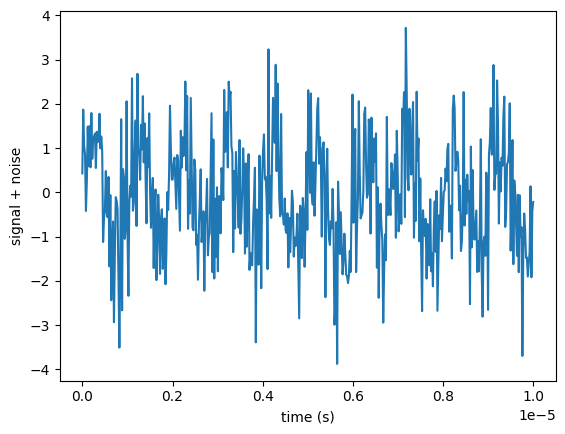

In [5]:
#Adding noise and signal

y_noisy = y + n
plt.xlabel("time (s)")
plt.ylabel("signal + noise")
plt.plot(t, y_noisy)
plt.show()

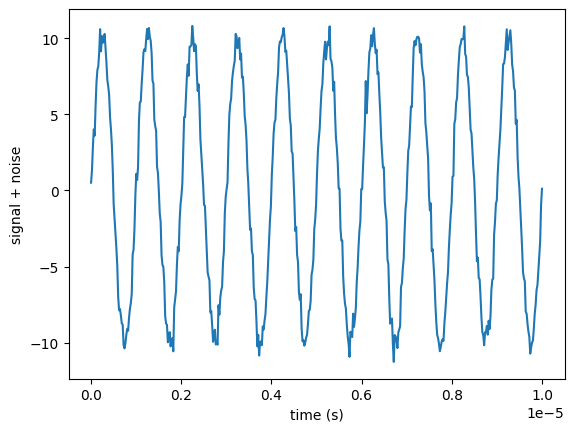

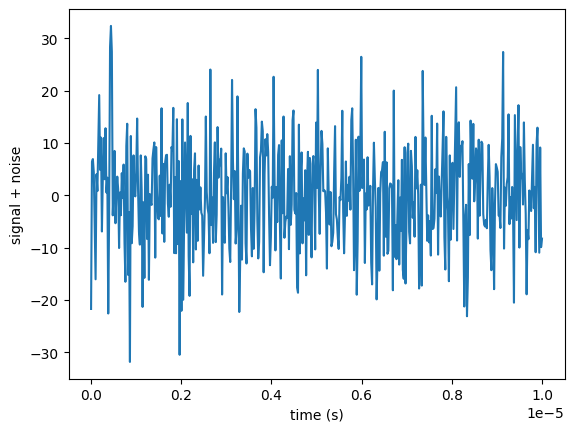

In [6]:
#Scenarios with either noise dominace or signal dominance
#a high SNR
sig_amp_high = 10
noise_amp_low = 0.5
n_scen_a = np.random.normal(0, noise_amp_low, N)

y_dominant = sig_amp_high*y + n_scen_a
plt.xlabel("time (s)")
plt.ylabel("signal + noise")
plt.plot(t, y_dominant)
plt.show()

#b low SNR
sig_amp_low = 1
noise_amp_high = 10
n_scen_b = np.random.normal(0, noise_amp_high, N)
y_notdominant = sig_amp_low*y + n_scen_b
plt.xlabel("time (s)")
plt.ylabel("signal + noise")
plt.plot(t, n_scen_b)
plt.show()






In [7]:
#Calculating the signal-to-noise ratio (SNR)

SNR_est_a = np.mean(sig_amp_high**2)/np.mean(noise_amp_low**2)
SNR_est_b = np.mean(sig_amp_low**2)/np.mean(noise_amp_high**2)
SNR_est_a_dB = 10*np.log10(SNR_est_a)
SNR_est_b_dB = 10*np.log10(SNR_est_b)
print(SNR_est_a_dB)
print(SNR_est_b_dB)

26.020599913279625
-20.0


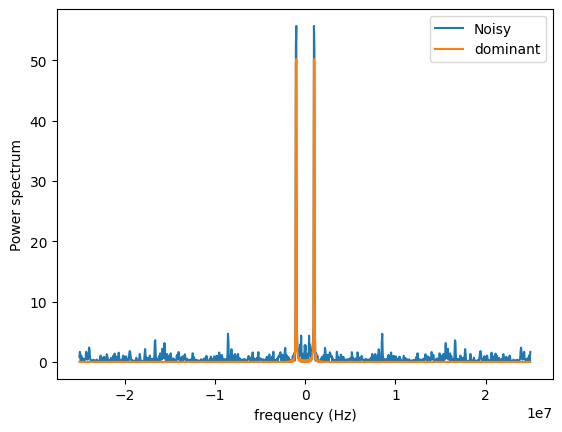

In [11]:
#Power spectrum (frequency) analysis
Nfft = 1024
Y_noisy = np.fft.fft(y_noisy, Nfft)
Y_dominant = np.fft.fft(y, Nfft)

Ps_noisy = (1/Nfft)*np.abs(Y_noisy)**2
Ps_dominant = (1/Nfft)*np.abs(Y_dominant)**2
Pshiftet_noisy = np.fft.fftshift(Ps_noisy)
Pshiftet_dominant = np.fft.fftshift(Ps_dominant)
f = np.fft.fftshift(np.fft.fftfreq(Nfft, 1/fc))
plt.xlabel("frequency (Hz)")
plt.ylabel("Power spectrum")
plt.plot(f, Pshiftet_noisy, label = "Noisy")
plt.plot(f, Pshiftet_dominant, label = "dominant")
plt.legend()
plt.show()
